In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os


In [4]:
DATA_DIR = r"C:\Users\priya\OneDrive\Desktop\dataset"

CLASS_FOLDERS = {
    "Clear Skin": "Clear Skin",                            
    "Dark Spots": "Dark Spots",
    "Puffy Eyes": "Puffy Eyes",
    "Wrinkles":   "Wrinkles"
}

IMG_SIZE = 224

images = []
labels_list = []

for label_name, folder_name in CLASS_FOLDERS.items():
    folder_path = os.path.join(DATA_DIR, folder_name)
    
    if not os.path.isdir(folder_path):
        print(" Folder not found:", folder_path)
        continue

    for file in os.listdir(folder_path):
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            img = Image.open(os.path.join(folder_path, file)).convert("RGB")
            img = img.resize((IMG_SIZE, IMG_SIZE))
            images.append(np.array(img)/255.0)
            labels_list.append(label_name)

images = np.array(images)
print("Loaded:", len(images), "images")


Loaded: 1203 images


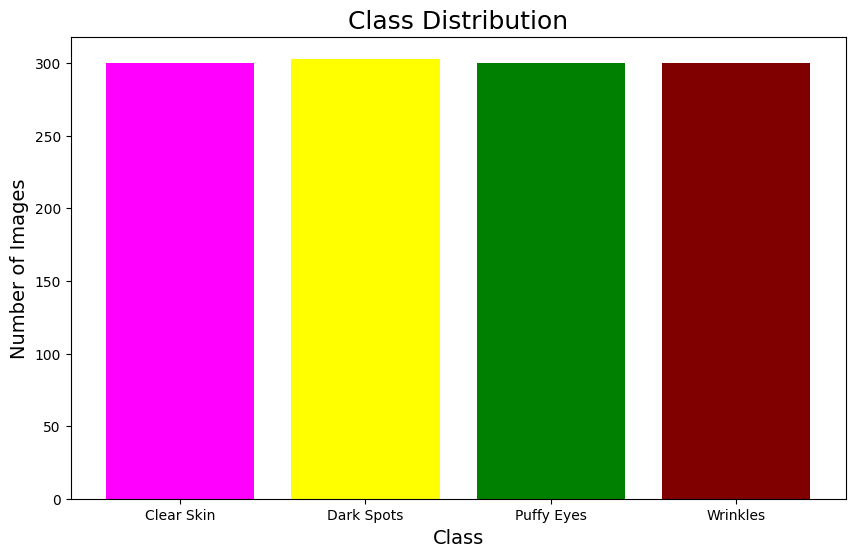

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

# Count labels
label_counts = Counter(labels_list)

classes = list(label_counts.keys())
counts  = list(label_counts.values())

colors = ["magenta", "yellow", "green", "maroon"]


plt.figure(figsize=(10, 6))

bars = plt.bar(classes, counts, color=colors)

# Title and labels (like your figure)
plt.title("Class Distribution", fontsize=18)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.show()


In [11]:
from tensorflow.keras.utils import to_categorical
import numpy as np

label_map = {
    "Clear Skin": 0,
    "Dark Spots": 1,
    "Puffy Eyes": 2,
    "Wrinkles": 3
}

labels_numeric = np.array([label_map[l] for l in labels_list])

# Convert integer labels to one-hot encoded vectors
labels_onehot = to_categorical(labels_numeric, num_classes=4)

print("Numeric labels shape:", labels_numeric.shape)
print("One-hot labels shape:", labels_onehot.shape)
print("Preview first 5 numeric labels:", labels_numeric[:5])
print("Preview first 5 one-hot rows:\n", labels_onehot[:5])


Numeric labels shape: (1203,)
One-hot labels shape: (1203, 4)
Preview first 5 numeric labels: [0 0 0 0 0]
Preview first 5 one-hot rows:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    images,
    labels_onehot,
    test_size=0.2,
    stratify=labels_numeric,
    random_state=42
)

print("Training images:", X_train.shape)
print("Validation images:", X_val.shape)


Training images: (962, 224, 224, 3)
Validation images: (241, 224, 224, 3)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # <-- added

# Path to your dataset
DATA_DIR = r"C:\Users\priya\OneDrive\Desktop\dataset"

IMG_SIZE = 224

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)


class_folders = []
for folder in os.listdir(DATA_DIR):
    folder_path = os.path.join(DATA_DIR, folder)
    if os.path.isdir(folder_path):
        img_files = [f for f in os.listdir(folder_path) 
                     if f.lower().endswith(('.jpg','.jpeg','.png'))]
        if len(img_files) > 0:
            class_folders.append(folder)

print("Detected class folders:", class_folders)

# pick the class folder
sample_class = class_folders[0]
sample_folder = os.path.join(DATA_DIR, sample_class)



img = load_img(sample_path, target_size=(IMG_SIZE, IMG_SIZE))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

aug_iter = train_datagen.flow(x, batch_size=1)


titles = ["Aug 1", "Aug 2", "Aug 3", "Aug 4", "Aug 5"]

plt.figure(figsize=(15, 3))
for i, title in enumerate(titles):
    batch = next(aug_iter)
    plt.subplot(1, 5, i + 1)
    plt.imshow(batch[0])
    plt.axis("off")
    plt.title(title)

plt.tight_layout()
plt.show()
